# Questão 2

A propriedade de ordenação topológica do algoritmo SOM pode ser usada para formar
uma representação bidimensional abstrata para fins de visualização de um espaço de entrada de alta dimensionalidade. O objetivo é visualizar os dados de dimensão 8 em um espaço
de dimensão 2, constituído pela grade de neurônios. Para investigar esta forma de representação, considere uma grade bidimensional de neurônios que é treinada tendo como entrada
os dados oriundos de quatro distribuições gaussianas, $C_1, C_2, C_3,$ e $C_4$, em um espaço de
entrada de dimensionalidade igual a oito, isto é:

$x = (x_1, x_2, ..., x_8)^t$

Todas as nuvens de dados têm variâncias unitária, mas centroídes (vetores média) diferentes, dados por:

$m1 = (0,0,0,0,0,0,0,0)^t$

$m2 = (4,0,0,0,0,0,0,0)^t$

$m3 = (0,0,0,4,0,0,0,0)^t$

$m4 = (0,0,0,0,0,0,0,4)^t$

Faça um código em python que:

(a) Gere as quatro distribuições gaussianas correspondentes a cada centroíde.

(b) Utilizando uma rede SOM formada por uma grade de neurônio 10x10 neurônio obtenha
a representação das quatro distribuições em duas dimensões no SOM.

## Imports das bibliotecas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom

## Configurações gerais

In [3]:
data_dim = 8  # Dimensionalidade dos dados
num_samples = 1000  # Número de amostras por distribuição

# Centroídes das distribuições gaussianas
means = [
    np.array([0, 0, 0, 0, 0, 0, 0, 0]),
    np.array([4, 0, 0, 0, 0, 0, 0, 0]),
    np.array([0, 0, 0, 4, 0, 0, 0, 0]),
    np.array([0, 0, 0, 0, 0, 0, 0, 4]),
]

# Gerar as distribuições gaussianas

In [4]:
# Gerar as distribuições gaussianas
data = []
labels = []
for i, mean in enumerate(means):
    dist = np.random.normal(loc=mean, scale=1.0, size=(num_samples, data_dim))
    data.append(dist)
    labels.extend([i] * num_samples)

data = np.vstack(data)
labels = np.array(labels)

## Rede SOM

In [5]:
som_dim = 10  # Dimensão da grade SOM (10x10)
som = MiniSom(som_dim, som_dim, data_dim, sigma=1.0, learning_rate=0.5, neighborhood_function='gaussian', random_seed=42)

# Normalizar os dados para a entrada do SOM
data_min = data.min(axis=0)
data_max = data.max(axis=0)
data_norm = (data - data_min) / (data_max - data_min)

# Treinar o SOM
som.pca_weights_init(data_norm)
som.train_random(data_norm, 10000, verbose=True)

# Mapear os dados para o SOM
mapped_coords = np.array([som.winner(x) for x in data_norm])

c:\Users\pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\minisom.py:447: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + \


 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.23803102276990054


## Visualização da rede SOM

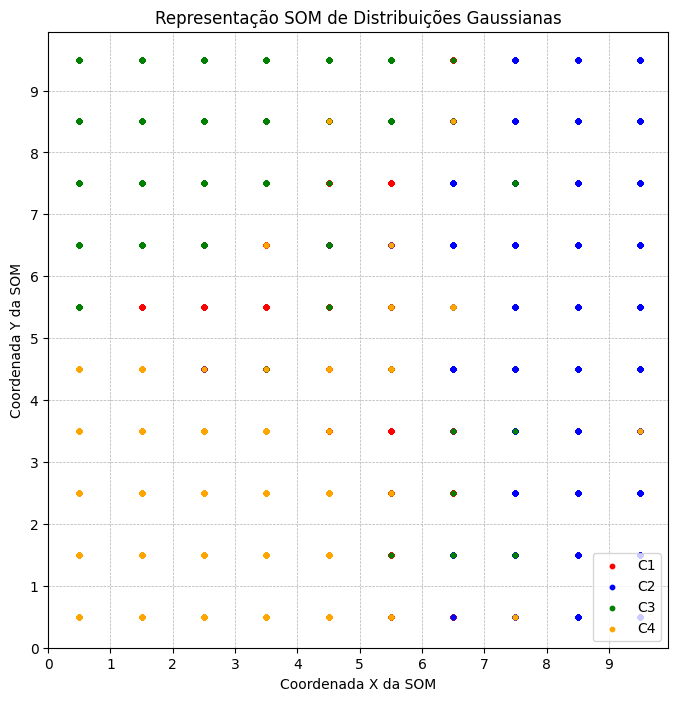

In [7]:
# Visualizar as distribuições no SOM
plt.figure(figsize=(8, 8))
colors = ['red', 'blue', 'green', 'orange']
for i in range(4):
    idx = labels == i
    plt.scatter(mapped_coords[idx, 0] + 0.5, mapped_coords[idx, 1] + 0.5, s=10, color=colors[i], label=f'C{i + 1}')

plt.xticks(range(som_dim))
plt.yticks(range(som_dim))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.title('Representação SOM de Distribuições Gaussianas')
plt.xlabel('Coordenada X da SOM')
plt.ylabel('Coordenada Y da SOM')
plt.show()